In [1]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

import os 
print(os.getcwd()) 
    
#import hepran
#import hepran.bzipscore as bz
#import hepran.bcipa as bc
#import hepran.utils as u
#import hepran.registers as r
#import hepran.agadir as ag

import pandas as pd
import numpy as np
import seaborn as sns
    
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt
import sklearn as sk


CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
SFD = os.environ.get("SFD",r"D:\data\ortoCC\fine_tune_scoring_function\sets")
from score_utils import *
from set_utils import *


D:\data\ortoCC\fine_tune_scoring_function
['f' 'g' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'a' 'b'
 'c' 'd' 'e' 'f' 'g' 'a' 'b' 'c' 'd' 'e' 'f']
Register_indices(a=array([ 2,  9, 16, 23], dtype=int64), b=array([ 3, 10, 17, 24], dtype=int64), c=array([ 4, 11, 18, 25], dtype=int64), d=array([ 5, 12, 19, 26], dtype=int64), e=array([ 6, 13, 20, 27], dtype=int64), f=array([ 0,  7, 14, 21, 28], dtype=int64), g=array([ 1,  8, 15, 22], dtype=int64), seq=array(['D', 'K', 'N', 'A', 'A', 'L', 'K', 'A', 'E', 'N', 'A', 'A', 'L',
       'E', 'Y', 'E', 'I', 'A', 'A', 'L', 'E', 'A', 'E', 'I', 'A', 'A',
       'L', 'E', 'G'], dtype='<U1'), reg=array(['f', 'g', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'a', 'b', 'c', 'd',
       'e', 'f', 'g', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'a', 'b', 'c',
       'd', 'e', 'f'], dtype='<U1'))


In [2]:
from interactive_set_plot import *

import bokeh
import bokeh.resources
import bokeh.plotting as bp
from bokeh.models import HoverTool
from IPython.core.display import display, HTML
import hepran
bp.output_notebook()

import sklearn
from sklearn import linear_model
from sklearn.externals import joblib

from IPython.display import display, HTML

Loading BokehJS ...

In [34]:
df = df.apply(get_CC_features, axis=1)
#df.rename(columns={'RD_Tm':'Tm'}, inplace=True)
df['Tm']=df.RD_Tm
df['norm_sd_RD'] = df.sd_RD/df.sd_RD.mean()
df['cv_RD'] = df.sd_RD/df.mean_RD
df['weights'] = 1

corrR  R2_score  \
N_iter fit_type                         fit_class                       
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.571369  0.131252   
                                        Tm>25      0.580704  0.122789   
                                        Tm>55      0.088471 -3.604382   
                                        on_target  0.449496 -0.585352   

                                                        RMSE  med_abs_err  \
N_iter fit_type                         fit_class                           
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all         8.162198     2.374410   
                                        Tm>25       8.118684     2.322242   
                                        Tm>55      13.706547     3.242493   
                                        on_target   9.970023     2.294156   

                                                   explained_var  Baysian_IC  \
N_iter fit_type                         fit_class                              
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all             0.140675  366.734484   
                                        Tm>25           0.139562  357.290156   
                                        Tm>55          -1.854554   25.594752   
                                        on_target      -0.074505   43.720830   

                                                    Akaike_IC N_samples  \
N_iter fit_type                         fit_class                         
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        685.347393        78   
                                        Tm>25      665.449289        76   
                                        Tm>55       37.003079         3   
                                        on_target   56.345551         6   

                                                  N_feat     OI_exp   GAP_exp  \
N_iter fit_type                         fit_class                               
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all            9  49.815558  8.450182   
                                        Tm>25          9  49.815558  8.450182   
                                        Tm>55          9  49.815558  8.450182   
                                        on_target      9  49.815558  8.450182   

                                                   NAM_exp     OI_mod  \
N_iter fit_type                         fit_class                       
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all              0  31.423072   
                                        Tm>25            0  31.423072   
                                        Tm>55            0  31.423072   
                                        on_target        0  31.423072   

                                                    GAP_mod  NAM_mod  \
N_iter fit_type                         fit_class                      
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all       -5.051968        4   
                                        Tm>25     -5.051968        4   
                                        Tm>55     -5.051968        4   
                                        on_target -5.051968        4   

                                                           set  
N_iter fit_type                         fit_class               
0      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        PNIC.bA.set  
                                        Tm>25      PNIC.bA.set  
                                        Tm>55      PNIC.bA.set  
                                        on_target  PNIC.bA.set

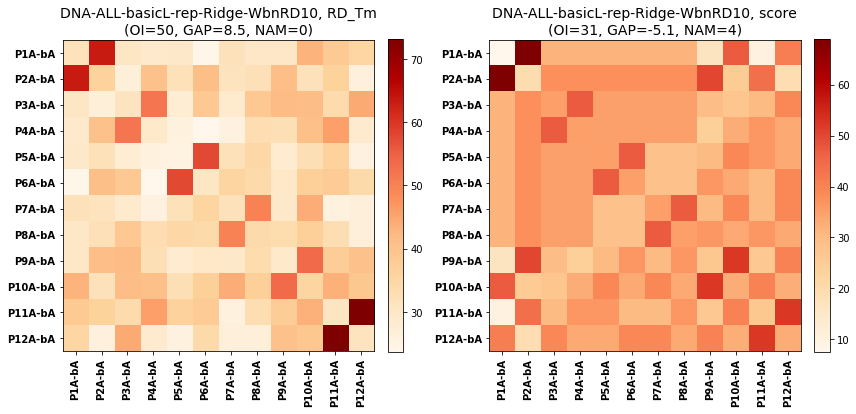

In [46]:
def do_plots(aiter, do_score_overlap=False):
    #load model 
    global fit_metrics_all
    global df
    global N_iter
    global lm
    global fit_fields
    global model_features_all
    N_iter = aiter
    model_features_all = pd.read_csv('models/{fit_name}.features.csv'.format(**globals()), index_col=[0,1])
    fit_fields = model_features_all.loc[N_iter]['feature'].values
    lm = joblib.load('models/{N_iter}_{fit_name}.model'.format(**globals()))
    if not do_score_overlap:
        df['score'] = lm.predict(df[fit_fields])
        df['pos'] = 0
        Q = df
    else:
        Q = score_overlap(df, lm, fit_fields, get_CC_features)
    
    
    Q = Q.apply(get_formated_seq, axis=1)
    Q['IDs']=Q.index
    title = fit_name
    #bp.output_file(title=title, filename='models\\{title}.plot.html'.format(**locals()))
    p = draw_scatter_interactive(target_field, 'score', Q, y_range=(0,80),                                
                                     title=title, save_to_file=False, tooltips=tooltips, width=450, height=450)


    
    ##show model table
    from bokeh.models.widgets import DataTable, NumberFormatter, TableColumn
    columns = [
            TableColumn(field="feature", title="Feature"),
            TableColumn(field="coef", title="Coeficients", formatter=NumberFormatter(format='+0.000')),
        ]
    model_feat = DataTable(source=bp.ColumnDataSource(model_features_all.loc[N_iter]),
                                                columns = columns,
                                                width=400, height=450)

    bp.show(
        bokeh.layouts.row(
            p,
            bokeh.layouts.widgetbox(model_feat),

        ))
    
    
    fit_metric = get_FIT_dataframe(Q, lm, N_iter, fit_name, N_feat=len(lm.coef_)+1, N_samples=len(Q))

    
    

    fig, axs = plt.subplots(1,2,figsize=[12,8])
    ax, OI, GAP, NAM = plot_orto_set(Q, ids, title=title, field="RD_Tm", pairs=pairs, ax=axs[0])
    fit_metric['OI_exp'] = OI
    fit_metric['GAP_exp'] = GAP
    fit_metric['NAM_exp'] = NAM
    
    ax, OI, GAP, NAM = plot_orto_set(Q, ids, title=title, field="score", pairs=pairs, ax=axs[1])
    fit_metric['OI_mod'] = OI
    fit_metric['GAP_mod'] = GAP
    fit_metric['NAM_mod'] = NAM
    
    
    fit_metric['set'] = set_name
    fit_metrics_all = fit_metrics_all.append(fit_metric)
    display(fit_metric)
    
do_plots(0, do_score_overlap=False)    

corrR  R2_score  \
N_iter fit_type                         fit_class                       
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.620452  0.267472   
                                        Tm>25      0.623796  0.255330   
                                        Tm>55      0.088471 -3.371331   
                                        on_target  0.449496 -0.487467   

                                                        RMSE  med_abs_err  \
N_iter fit_type                         fit_class                           
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all         7.495011     2.200963   
                                        Tm>25       7.480243     2.200457   
                                        Tm>55      13.355164     3.156039   
                                        on_target   9.657329     2.137583   

                                                   explained_var  Baysian_IC  \
N_iter fit_type                         fit_class                              
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all             0.272525  353.431443   
                                        Tm>25           0.264870  344.840916   
                                        Tm>55          -1.611107   25.438929   
                                        on_target      -0.013173   43.338440   

                                                    Akaike_IC N_samples  \
N_iter fit_type                         fit_class                         
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        672.044352        78   
                                        Tm>25      653.000050        76   
                                        Tm>55       36.847256         3   
                                        on_target   55.963162         6   

                                                  N_feat     OI_exp   GAP_exp  \
N_iter fit_type                         fit_class                               
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all            9  49.815558  8.450182   
                                        Tm>25          9  49.815558  8.450182   
                                        Tm>55          9  49.815558  8.450182   
                                        on_target      9  49.815558  8.450182   

                                                   NAM_exp     OI_mod  \
N_iter fit_type                         fit_class                       
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all              0  32.129288   
                                        Tm>25            0  32.129288   
                                        Tm>55            0  32.129288   
                                        on_target        0  32.129288   

                                                    GAP_mod  NAM_mod  \
N_iter fit_type                         fit_class                      
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all       -0.232517        2   
                                        Tm>25     -0.232517        2   
                                        Tm>55     -0.232517        2   
                                        on_target -0.232517        2   

                                                           set  
N_iter fit_type                         fit_class               
1      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        PNIC.bA.set  
                                        Tm>25      PNIC.bA.set  
                                        Tm>55      PNIC.bA.set  
                                        on_target  PNIC.bA.set

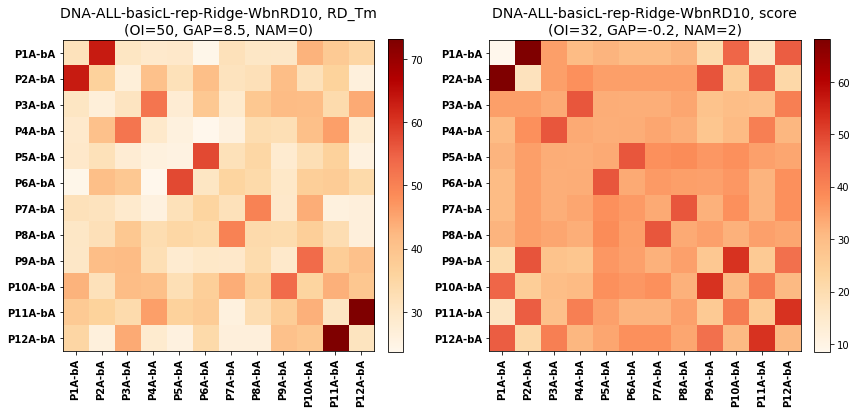

In [36]:
do_plots(1, do_score_overlap=True)

corrR  R2_score  \
N_iter fit_type                         fit_class                       
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.622764  0.253686   
                                        Tm>25      0.625301  0.237124   
                                        Tm>55      0.088471 -3.361255   
                                        on_target  0.449496 -0.483054   

                                                        RMSE  med_abs_err  \
N_iter fit_type                         fit_class                           
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all         7.565214     2.169297   
                                        Tm>25       7.571131     2.143873   
                                        Tm>55      13.339763     3.152275   
                                        on_target   9.642993     2.171709   

                                                   explained_var  Baysian_IC  \
N_iter fit_type                         fit_class                              
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all             0.268238  354.885836   
                                        Tm>25           0.258682  346.676657   
                                        Tm>55          -1.661279   25.432006   
                                        on_target      -0.025530   43.320613   

                                                    Akaike_IC N_samples  \
N_iter fit_type                         fit_class                         
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        673.498745        78   
                                        Tm>25      654.835791        76   
                                        Tm>55       36.840333         3   
                                        on_target   55.945335         6   

                                                  N_feat     OI_exp   GAP_exp  \
N_iter fit_type                         fit_class                               
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all            9  49.815558  8.450182   
                                        Tm>25          9  49.815558  8.450182   
                                        Tm>55          9  49.815558  8.450182   
                                        on_target      9  49.815558  8.450182   

                                                   NAM_exp     OI_mod  \
N_iter fit_type                         fit_class                       
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all              0  32.858449   
                                        Tm>25            0  32.858449   
                                        Tm>55            0  32.858449   
                                        on_target        0  32.858449   

                                                    GAP_mod  NAM_mod  \
N_iter fit_type                         fit_class                      
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.015542        0   
                                        Tm>25      0.015542        0   
                                        Tm>55      0.015542        0   
                                        on_target  0.015542        0   

                                                           set  
N_iter fit_type                         fit_class               
2      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        PNIC.bA.set  
                                        Tm>25      PNIC.bA.set  
                                        Tm>55      PNIC.bA.set  
                                        on_target  PNIC.bA.set

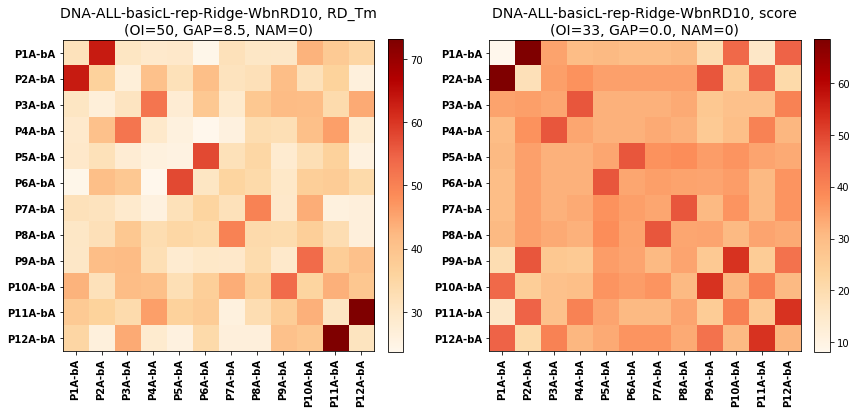

In [37]:
do_plots(2, do_score_overlap=True)

corrR  R2_score  \
N_iter fit_type                         fit_class                       
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.621044  0.250662   
                                        Tm>25      0.623907  0.234429   
                                        Tm>55      0.088471 -3.357421   
                                        on_target  0.449496 -0.481315   

                                                        RMSE  med_abs_err  \
N_iter fit_type                         fit_class                           
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all         7.580521     2.152017   
                                        Tm>25       7.584493     2.136021   
                                        Tm>55      13.333898     3.150605   
                                        on_target   9.637336     2.187989   

                                                   explained_var  Baysian_IC  \
N_iter fit_type                         fit_class                              
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all             0.265642  355.201151   
                                        Tm>25           0.256614  346.944686   
                                        Tm>55          -1.685767   25.429368   
                                        on_target      -0.031617   43.313571   

                                                    Akaike_IC N_samples  \
N_iter fit_type                         fit_class                         
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        673.814060        78   
                                        Tm>25      655.103820        76   
                                        Tm>55       36.837694         3   
                                        on_target   55.938293         6   

                                                  N_feat     OI_exp   GAP_exp  \
N_iter fit_type                         fit_class                               
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all            9  49.815558  8.450182   
                                        Tm>25          9  49.815558  8.450182   
                                        Tm>55          9  49.815558  8.450182   
                                        on_target      9  49.815558  8.450182   

                                                   NAM_exp     OI_mod  \
N_iter fit_type                         fit_class                       
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all              0  33.107617   
                                        Tm>25            0  33.107617   
                                        Tm>55            0  33.107617   
                                        on_target        0  33.107617   

                                                    GAP_mod  NAM_mod  \
N_iter fit_type                         fit_class                      
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.079096        0   
                                        Tm>25      0.079096        0   
                                        Tm>55      0.079096        0   
                                        on_target  0.079096        0   

                                                           set  
N_iter fit_type                         fit_class               
3      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        PNIC.bA.set  
                                        Tm>25      PNIC.bA.set  
                                        Tm>55      PNIC.bA.set  
                                        on_target  PNIC.bA.set

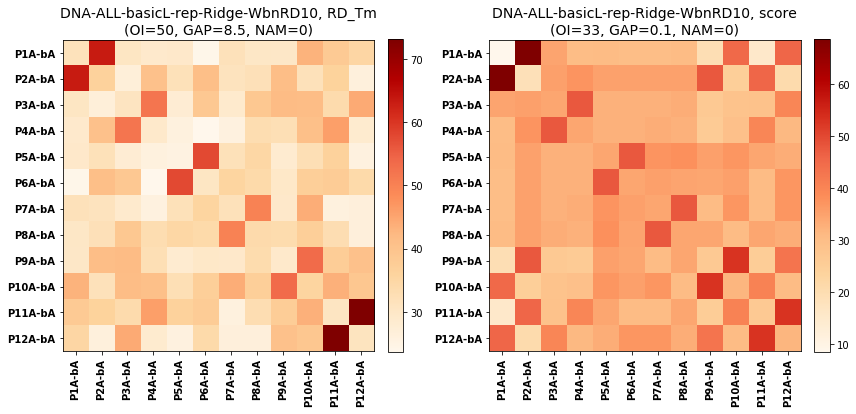

In [38]:
do_plots(3, do_score_overlap=True)

corrR  R2_score  \
N_iter fit_type                         fit_class                       
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.620980  0.250598   
                                        Tm>25      0.623863  0.234378   
                                        Tm>55      0.088471 -3.359698   
                                        on_target  0.449496 -0.482244   

                                                        RMSE  med_abs_err  \
N_iter fit_type                         fit_class                           
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all         7.580844     2.150522   
                                        Tm>25       7.584743     2.136803   
                                        Tm>55      13.337381     3.151458   
                                        on_target   9.640358     2.190522   

                                                   explained_var  Baysian_IC  \
N_iter fit_type                         fit_class                              
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all             0.265650  355.207813   
                                        Tm>25           0.256658  346.949688   
                                        Tm>55          -1.689609   25.430935   
                                        on_target      -0.032576   43.317334   

                                                    Akaike_IC N_samples  \
N_iter fit_type                         fit_class                         
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        673.820722        78   
                                        Tm>25      655.108821        76   
                                        Tm>55       36.839261         3   
                                        on_target   55.942056         6   

                                                  N_feat     OI_exp   GAP_exp  \
N_iter fit_type                         fit_class                               
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all            9  49.815558  8.450182   
                                        Tm>25          9  49.815558  8.450182   
                                        Tm>55          9  49.815558  8.450182   
                                        on_target      9  49.815558  8.450182   

                                                   NAM_exp     OI_mod  \
N_iter fit_type                         fit_class                       
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all              0  33.134033   
                                        Tm>25            0  33.134033   
                                        Tm>55            0  33.134033   
                                        on_target        0  33.134033   

                                                   GAP_mod  NAM_mod  \
N_iter fit_type                         fit_class                     
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.07701        0   
                                        Tm>25      0.07701        0   
                                        Tm>55      0.07701        0   
                                        on_target  0.07701        0   

                                                           set  
N_iter fit_type                         fit_class               
4      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        PNIC.bA.set  
                                        Tm>25      PNIC.bA.set  
                                        Tm>55      PNIC.bA.set  
                                        on_target  PNIC.bA.set

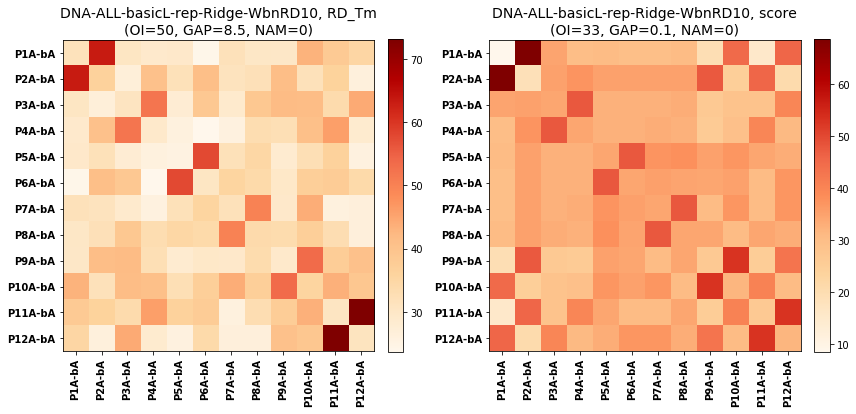

In [39]:
do_plots(4, do_score_overlap=True)

corrR  R2_score  \
N_iter fit_type                         fit_class                       
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.620980  0.250598   
                                        Tm>25      0.623863  0.234378   
                                        Tm>55      0.088471 -3.359698   
                                        on_target  0.449496 -0.482244   

                                                        RMSE  med_abs_err  \
N_iter fit_type                         fit_class                           
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all         7.580844     2.150522   
                                        Tm>25       7.584743     2.136803   
                                        Tm>55      13.337381     3.151458   
                                        on_target   9.640358     2.190522   

                                                   explained_var  Baysian_IC  \
N_iter fit_type                         fit_class                              
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all             0.265650  355.207813   
                                        Tm>25           0.256658  346.949688   
                                        Tm>55          -1.689609   25.430935   
                                        on_target      -0.032576   43.317334   

                                                    Akaike_IC N_samples  \
N_iter fit_type                         fit_class                         
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        673.820722        78   
                                        Tm>25      655.108821        76   
                                        Tm>55       36.839261         3   
                                        on_target   55.942056         6   

                                                  N_feat     OI_exp   GAP_exp  \
N_iter fit_type                         fit_class                               
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all            9  49.815558  8.450182   
                                        Tm>25          9  49.815558  8.450182   
                                        Tm>55          9  49.815558  8.450182   
                                        on_target      9  49.815558  8.450182   

                                                   NAM_exp     OI_mod  \
N_iter fit_type                         fit_class                       
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all              0  33.134033   
                                        Tm>25            0  33.134033   
                                        Tm>55            0  33.134033   
                                        on_target        0  33.134033   

                                                   GAP_mod  NAM_mod  \
N_iter fit_type                         fit_class                     
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        0.07701        0   
                                        Tm>25      0.07701        0   
                                        Tm>55      0.07701        0   
                                        on_target  0.07701        0   

                                                           set  
N_iter fit_type                         fit_class               
5      DNA-ALL-basicL-rep-Ridge-WbnRD10 all        PNIC.bA.set  
                                        Tm>25      PNIC.bA.set  
                                        Tm>55      PNIC.bA.set  
                                        on_target  PNIC.bA.set

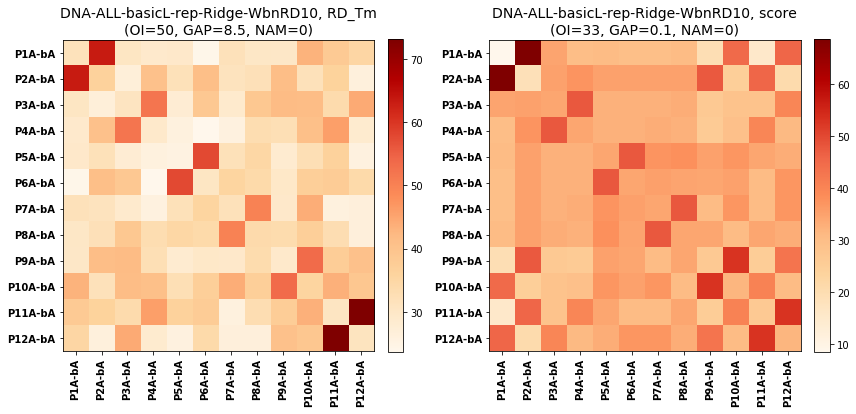

In [40]:
do_plots(5, do_score_overlap=True)

In [41]:
out_name = "SCORE_" + fit_name + "___" + set_name
fit_metrics_all.to_csv('models/{out_name}.metrics.csv'.format(**locals()) ) 